In [7]:
import cv2
import time

In [3]:
cam = cv2.VideoCapture(0)
bpm = 120
shift = 30  
start_time = time.time()

In [ ]:
while(True):
    success, frame = cam.read()

    if (not success):
        break

    shift = 30    
    h,w, _ = frame.shape
    #print(h,w) 480  640
    #frame[:,:,1] = 0

    #frame[:,0: w-shift,2] = frame[:,shift:, 2]
    ###frame[:,0:w//2,:] = frame[:,w//2:w, :]
    #frame[:,0:w//2,:] = frame[:,w:w//2-1:-1, :] #2 головы

    #frame[0:h//2,0:w//2,:] = frame[h:h//2-1:-1,w:w//2-1:-1, :]
    #frame[h:h//2-1:-1,0:w//2,:] = frame[0:h//2,w:w//2-1:-1, :] вверх ногами

    #frame[h:h//2-1:-1,0:w//2,:] = frame[0:h//2,w:w//2-1:-1, :]

    #frame[0:h//2,w:w//2-1:-1,:] = frame[0:h//2,0:w//2, :] Эффект зеркала

            #frame[0:h//2,w:w//2-1:-1,:] = frame[0:h//2,0:w//2, :] 
            #frame[:,0:w//2,:] = frame[:,w:w//2-1:-1, :]       # левая зона отражает в правую, правая в левую

    #frame[:,0:w//2,1] = frame[:,w:w//2-1:-1, 1] #тут , баловство с цветами  
    

    #frame[0:h//2,w:w//2-1:-1,:0] = frame[0:h//2,0:w//2, :0]

    #frame[:,w:0:-1,:] = frame[:,1:w, :]
    #frame[:,:,0] = 0

    cv2.imshow("window", frame)
    key = cv2.waitKey(30)

    if (key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(30)


KeyboardInterrupt: 

: 

In [ ]:

while (True):
    success, frame = cam.read()

    if (not success):
        break

    i = int((time.time() - start_time) / 60 * bpm)

    if (i % 4 == 0):
        frame = 255 - frame
    
    if (i % 4 == 1):
        frame[:, :, 2] = 20
    
    if (i % 4 == 2):
        frame[:, :, 1] -= 120

    h, w, _ = frame.shape

    if (i % 4 == 3):
        frame[:, 0 : w - shift, 2] = frame[:, shift : , 2]

    #i += 1

    cv2.imshow("window", frame)
    key = cv2.waitKey(30)# & 0xFF

    if (key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(30)

-1

In [ ]:
import json
import os
#f = open ('colors.json')

if os.path.exists('colors.json'):
    pass
else:
    data = [0,0,0,0,0,0]
    with open ('colors.json', 'w') as f:
        json.dump(data, f)



In [73]:
with open ('color.json', 'r') as f:
        try:
            data = json.load(f)
        except:
            data = [0,0,0,0,0,0]

In [52]:
#colors_info = {'lb':0,'lg' : 10,'lr' :2,'hb' :3,'hg' :4,'hr' :6}
colors_info = [0,1,2,3,4,5]
with open ('colors.json', 'w') as f:
    try:
        json.dump(colors_info, f)
    except:
        json.dump("Issue with record", f)

In [86]:
obj = []
obj.append(3-2)
obj

[1]

In [101]:
import cv2
import time
import numpy as np

def nothing(i):
    pass

if os.path.exists('colors.json'):
    pass
else:
    data = [0,0,0,0,0,0]
    with open ('colors.json', 'w') as f:
        json.dump(data, f)


with open ('colors.json', 'r') as f:
    try:
        data = json.load(f)
    except:
        data = [0,0,0,0,0,0]

obj_coord = []
obj_time = []

cv2.namedWindow('mask1')
cam = cv2.VideoCapture(0)
cv2.createTrackbar('low_blue', 'mask1', data[0],255, nothing)
cv2.createTrackbar('low_green', 'mask1', data[1],255, nothing)
cv2.createTrackbar('low_red', 'mask1', data[2],255, nothing)
cv2.createTrackbar('high_blue', 'mask1', data[3],255, nothing)
cv2.createTrackbar('high_green', 'mask1', data[4],255, nothing)
cv2.createTrackbar('high_red', 'mask1', data[5],255, nothing)

start_time = time.time()
while (True):
    success, frame = cam.read()

    if (not success):
        break

    

    h, w, _ = frame.shape

    low_blue = cv2.getTrackbarPos('low_blue', 'mask1')
    low_green = cv2.getTrackbarPos('low_green', 'mask1')
    low_red = cv2.getTrackbarPos('low_red', 'mask1')
    high_blue = cv2.getTrackbarPos('high_blue', 'mask1')
    high_green = cv2.getTrackbarPos('high_green', 'mask1')
    high_red = cv2.getTrackbarPos('high_red', 'mask1')
    
    mask1 = cv2.inRange(frame, (low_blue,low_green,low_red), (high_blue,high_green,high_red))
    #mask1 = cv2.inRange(frame, (70,25,25), (250,180,70))

    colors_info = [low_blue, low_green, low_red, high_blue,high_green,high_red]

    ksz = 7
    kernel = np.ones((ksz,ksz))
    dilate = cv2.dilate(mask1,kernel)
    eroded = cv2.dilate(dilate,kernel)


    concat = np.concatenate((mask1, eroded), axis = 1)

    output = cv2.connectedComponentsWithStats(eroded)
    num_comp = output[0]
    stats = output[2]

    for i in range(1,num_comp):
        top = stats[i, cv2.CC_STAT_TOP]
        left = stats[i, cv2.CC_STAT_LEFT]
        width = stats[i, cv2.CC_STAT_WIDTH]
        height = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
        if (area > 2500) & (i == 1):
            end_time = time.time()
            obj_coord.append(left)
            obj_time.append(end_time - start_time)
        if area > 2500:
            cv2.rectangle(frame, (left, top), (left + width, top + height), (123, 231, 51), 5)

    #print('next')
    cv2.imshow('concat', concat)


    

    #mask = cv2.inRange(frame, (70,130,100), (120,250,230))

    #mask2 = cv2.inRange(frame, (70,130,120), (150,250,230))

    #unified = cv2.bitwise_or(mask1,mask2)
    
    #double_mask = np.concatenate((mask1, mask2), axis=0)

    #cv2.imshow('double mask', double_mask)
    #cv2.imshow('mask', unified)
    cv2.imshow('mask1', mask1)
    

    cv2.imshow("window", frame)
    key = cv2.waitKey(30)# & 0xFF

    if (key == ord('q')):
        break

with open ('colors.json', 'w') as f:
    try:
        json.dump(colors_info, f)
    except:
        json.dump("Issue with record", f)

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(30)

-1

In [103]:
cam.release()
cv2.destroyAllWindows()
cv2.waitKey(30)

-1

In [89]:
print(obj_coord)
print(obj_time)

[226, 207, 207, 207, 214, 211, 211, 200, 184, 184, 184, 167, 167, 154, 142, 142, 122, 88, 88, 59, 51, 51, 51, 67, 67, 91, 114, 114, 137, 150, 150, 150, 41, 41, 84, 119, 119, 119, 142, 142, 161, 184, 184, 184, 212, 212, 241, 268, 268, 330, 330, 356, 360, 360, 364, 371, 371, 385, 395, 395, 395, 399, 399, 402, 403, 403, 402, 401, 401, 401, 400, 400, 399, 398, 398, 397, 396, 396, 396, 390, 390, 390, 29, 29, 542, 303, 303, 368, 362, 362, 299, 480, 478, 478, 477, 477, 477, 247, 247, 284, 280, 280, 261, 293, 293, 293, 276, 276, 184, 184, 162, 162, 162, 157, 157, 228, 260, 260, 250, 250, 250, 234, 234, 239, 269, 269, 387, 410, 362, 324, 324, 324, 288, 288, 319, 319, 370, 370, 370, 392, 392, 414, 430, 430, 439, 61, 97, 237, 237, 388, 388, 148, 148, 148, 321, 321, 321, 389, 73, 22, 22, 59, 59, 59, 353, 353, 67, 67, 60, 60, 93, 93, 36, 36, 36, 295, 295, 354, 87]
[-0.6094250679016113, -1.0516645908355713, -1.1049020290374756, -1.1548357009887695, -1.5886926651000977, -1.659123182296753, -1.7169337

In [ ]:
coordinates_info = (obj_time,obj_coord)
coordinates_info[1]

[226,
 231,
 231,
 231,
 237,
 237,
 241,
 246,
 246,
 250,
 253,
 253,
 253,
 254,
 254,
 252,
 253,
 253,
 253,
 261,
 261,
 269,
 277,
 277,
 291,
 306,
 306,
 306,
 325,
 325,
 338,
 358,
 358,
 358,
 373,
 373,
 373,
 369,
 369,
 369,
 360,
 360,
 358,
 367,
 367,
 367,
 374,
 374,
 385,
 393,
 393,
 397,
 391,
 391,
 391,
 387,
 387,
 382,
 377,
 377,
 377,
 377,
 377,
 377,
 378,
 378,
 378,
 377,
 377,
 381,
 386,
 386,
 395,
 404,
 404,
 404,
 410,
 410,
 414,
 416,
 416,
 416,
 415,
 415,
 414,
 412,
 412,
 408,
 403,
 403,
 403,
 201,
 201,
 201,
 105,
 105,
 70,
 81,
 81,
 81,
 142,
 142,
 253,
 142,
 184,
 184,
 280,
 337,
 337,
 390,
 389,
 389,
 389,
 360,
 360,
 297,
 121,
 121,
 121,
 124,
 124,
 162,
 219,
 219,
 293,
 325,
 325,
 292,
 154,
 128,
 128,
 128,
 141,
 141,
 187,
 260,
 260,
 260,
 328,
 328,
 381,
 392,
 392,
 383,
 325,
 325,
 325,
 144,
 144,
 128,
 152,
 152,
 152,
 215,
 215,
 285,
 339,
 339,
 339,
 383,
 383,
 383,
 338,
 338,
 280,
 201,
 201,
 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


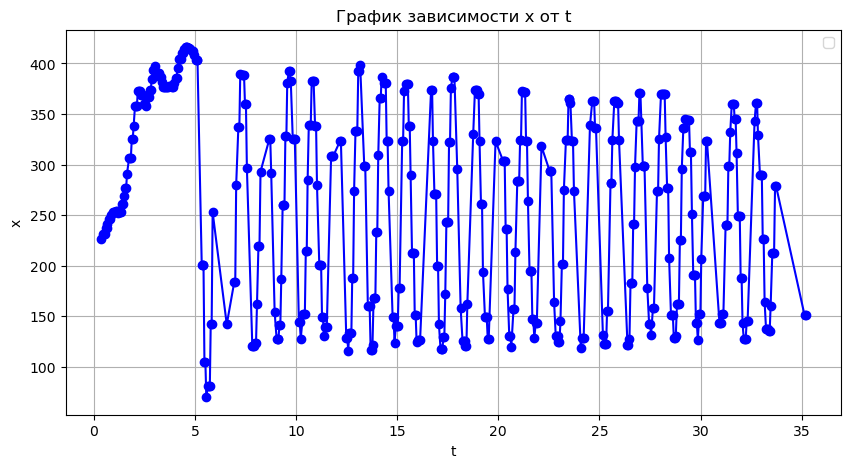

In [96]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))  
plt.plot(coordinates_info[0], coordinates_info[1], marker='o', linestyle='-', color='b') 

# Добавление заголовка и меток осей
plt.title('График зависимости x от t')
plt.xlabel('t')
plt.ylabel('x')

# Добавление легенды
plt.legend()

# Отображение сетки
plt.grid()

# Показать график
plt.show()
